<a href="https://colab.research.google.com/github/Laura9704/2025_-Analisis/blob/main/ANALISIS_UNIVARIADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
sns.set_theme(style="whitegrid")

#llamado de la informacion
data = pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')

Mounted at /content/drive


**INTRODUCCION**

El presente trabajo se enfoca en detallar los pasos del analisis univariado a la informacion de la base del 2021 BRFSS Dataset from CDC;es el Sistema de Vigilancia de Factores de Riesgo Conductual (BRFSS) el cual es el principal sistema de encuestas telefónicas relacionadas con la salud donde se recopila datos estatales sobre los residentes de EE. UU en base a estilos de vida y salud, esta base consta con 19 caracteristicas para analisis de las cuales 7 son numericas y 12 son categoricas.Por ello este análisis univariado, se busca explorar y comprender las características fundamentales del conjunto de datos, como es la distribución, la tendencia central, la dispersión y los posibles patrones presentes en los datos antes de realizar análisis más complejos.

Para llevar a cabo este análisis, se ha realizado una cuidadosa selección de variables,en base a estudios previos que modelan riesgo de enfermadades cardicas o cardiovasculares. tomando en cuenta su relevancia en el contexto del estudio. Las variables seleccionadas son:

*   AGE_CATEGORY
*   DIABETES
*   Heart Disease
*   Height(cm), Weight(kg) y BMI, estas variables estan relacionadas entre si
*   Fruit Consumption
*   Green Vegetables Consumption  
*   FriedPotato Consumption


**SELECCIÓN DE LA VARIABLE**

Para la seleccion de la variable se prosiguen los siguientes pasos de analisis en los datos de la base llamada CVD_cleaned.csv, la cual consiste en reconocimiento del tamano de la informacion la cual consta de 19 columnas o etiquetas con 308854 registros, de los cuales hay informacion categorica y numerica, a continuacion se anexala informacion de las batos en la base






In [2]:
print("Información del conjunto de datos:\n")
data.info()

Información del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(


*   **Variables Categoricas**:son aquellas que toman un número limitado de categorías o grupos. Estas variables no tienen un orden o un valor numérico específico, en la informacion del dataset se encuentran las variables:

*  **General_Health**:  Esta variable representa la salud general de los encuenstados por el BRFFSS, el cual tiene la siguiente distribucion la cual esta desbalanceada en el sentido de que una de las opciones tiene mayor siendo buena salud del 35.8% con respecto a una menor cantidad con pobre/mala con el 3.7% de los registro :
     
  **pregunta asociada:**  ¿Diría usted que en general su salud es...?

   **Excellent:** e registraron 55,954 personas con una excelente salud general, esta representa el  **18.1%**  de los datos.

   **Very Good**  Con 110395 registros de tener una muy buena salud general, representa el **35.8%**.

   **Good** Con 95364 personas tienen una salud buena, con el **30.9%**

   **Fair** Con 35810  regristros para normal(regular) de salud, con el valor del **11.6%**.

   **Poor:** Con 11331 de tener una salud pobre, con el **3.7%**.
   
 Esta variable no es muy representativa en el analisis del resgo de una enfermedad cardica, ya que como caracteristica es demasiado general dentro al contexto a analizar, por lo cual no proporciona informacion especifica ni relevante sobre los riesgos cordiovasculares que deben considerarse para evaluar adecuadamente el riesgo de enfermedad cardíaca



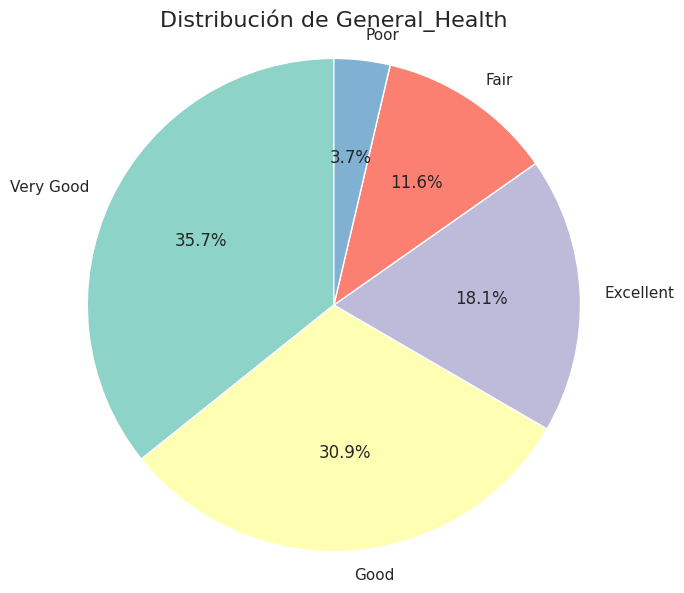

In [12]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['General_Health'].value_counts(), labels=data['General_Health'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['General_Health'].value_counts())))
plt.title("Distribución de General_Health", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()


   *  **Checkup**: esta caracteristica representa la frecuencia de tiempo vs cuanto tiempo ha transcurrido desde que se realiza un cheque o revision medica, la cual tiene como opciones en la revison de la informacion las siguientes

      **Within the past year**: con  239371 registros de una revision dentro del ultimo año, la cual representa un **77.5%** el cual es un alto indice dentro de los datos obtinidos nos preprenta un desbalance en las proporcion de distribucion de los datos para esta caracteristica
      
      **Within the past 2 years**: con     37213 registros para chequeos dentro de los ultimos años representa el **12.1%** de los datos, siendo  una representacion algo significativa para la clasificacion.
      
      **Within the past 5 years**: con    17442 registros de visitas de chequeo al medico dentro de los ultimos 5 años represnta un **5.7%**, de lo cual se puede intrepretar que los encuentados no considerar realiar una revision de salud mas periodica
      
      **5 or more years ago**  con 13421 de encuentados que realizan un cheque medico mayor a 5 años, que representa el **4.3%**
      
      **Never**  con 1407 de encuestados que no han realizado un chequeo medico que representa el **0.5%**

 Al igual que la variable de **Salud general**, esta variable no representa una gran relevancia en el análisis del riesgo de enfermedades cardíacas, ya que se enfoca en la frecuencia con la que se realiza un chequeo médico, como lo indica la pregunta de sondeo: '¿Aproximadamente cuánto tiempo ha pasado desde la última vez que visitó a un médico para un chequeo de rutina?'. Aunque esta pregunta puede proporcionar información útil en un análisis sobre la posibilidad de un diagnóstico temprano y un adecuado control de enfermedades, no se enfoca específicamente en los factores de riesgo cardíaco ni en aspectos determinantes para la prevención de enfermedades cardiovasculares.
   

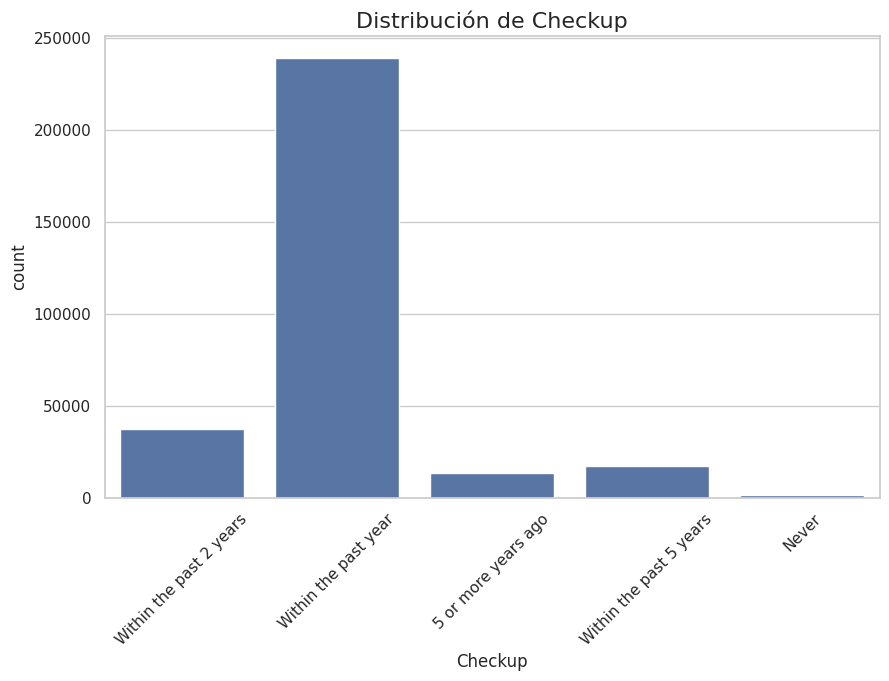

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Checkup',data=data)
plt.title('Distribución de Checkup', fontsize=16)
plt.xticks(rotation=45)
plt.show()


*   **Age_Category**: esta variable se considera categorica debido a que indican un rango de edad, no en una escala numérica continua. Las categorías que mencionas son grupos de edad y cada uno de esos grupos de rango contiene a todas las personas que tienen estas edades:

  **RANGO**   **CANT** | **RANGO**   **CANT**

  **18-24**  18,681   | **25-29**  15,494

  **30-34**	  18,428   | **35-39** 	20,606

  **35-39**  20,606   | **40-44**	  21,595
  
  **45-49**  	20,968  | **50-54**   	25,097
  
  **55-59** 28,054 |  **60-64**	  32,418

  **65-69**	33,434 | **70-74**	31,103

  **75-79**	20,705 | **80+**	22,271


Esta variable categorica es esencialmente representativa debido que con el paso de la años, las probabilidades de sufir alguna enfermedad cronica, como ejemplo las cardicas o degenerativas como la visual, tienden aumentar debido a los cambios biologicos y fisiologicos que ocurren en el desarrollo y crecimiento del individuo. No obstante, hay que recordar que existen aspectos geneticos que pueden fomentar que una persona joven desarrolle estas enfermedades, asi como las anomalias congenitas. para nuestro analisis es una de las variables a tener en consideracion al realizar un modelo de prediccion de un riesgo cardiaco.

Por otro lado, al analizar la distribución de las variables, se observa que la información está bien equilibrada, ya que no hay un escalamiento pronunciado entre las barras del gráfico. Esto sugiere que no existen grandes desigualdades en la frecuencia de las diferentes categorías, lo que podría indicar una distribución relativamente homogénea de los datos.





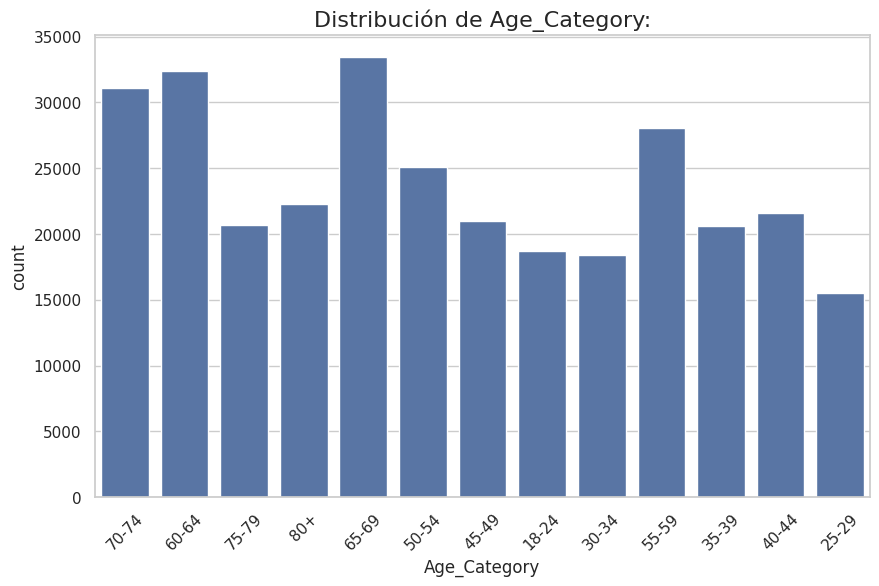

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Category',data=data)
plt.title('Distribución de Age_Category:', fontsize=16)
plt.xticks(rotation=45)
plt.show()

las siguientes variables son de 2 opcines como **YES** O **NO**, son de **FEMALE** OR **MALE**, aunque una de las opciones tiene observaciones del porque de la eleccion,tambien se destaca que enta parte se grafican las variables a condiderar en la modelacion:

*   **Exercise**: esta variable representa si la persona realiza una actividad fisica como lo manifiesta la pregunta objetivo: Durante el último mes, además de su trabajo habitual, ¿participó en alguna actividad física o ejercicio como correr, calistenia, golf, jardinería,..?, se puede considerear representativa ya que el ejercicio es considerado como un factor de prevension para enfermadades commo obesidad, enfermedades cardíacas, diabetes, artritis y depresión, entre otras  

Por otro lado, esta variable nos presentara un sesgo debido al desequilibrio de los datos, ya que el modelo puede estar más influenciado por la categoría mayoritaria (en este caso, las personas que hacen ejercicio) y subestimar o no capturar correctamente las características y patrones de las personas que no realizan actividad física




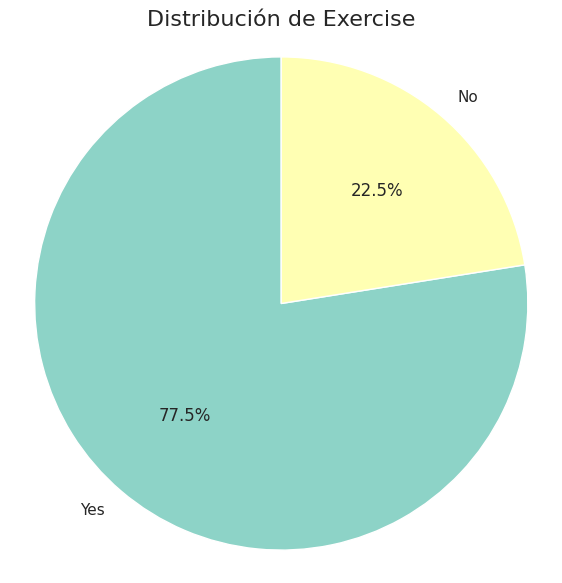

In [20]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['Exercise'].value_counts(), labels=data['Exercise'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['Exercise'].value_counts())))
plt.title("Distribución de Exercise", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()


*   **Heart_Disease**: Esta caracteristica representa a los encuestados que informaron tener enfermedad cardíaca coronaria o infarto de miocardio, lo cual hace que esta sea una variable fundamental en para analisar el riesgo cardiovascular, tomando encuenta su distribuccion hay una gran probabiliadad de sesgo por parte de ella debido a su representacion dentro de los datas hacia personas que no presentan una enfermedad cardíaca coronaria o han tenido un infarto de miocardio





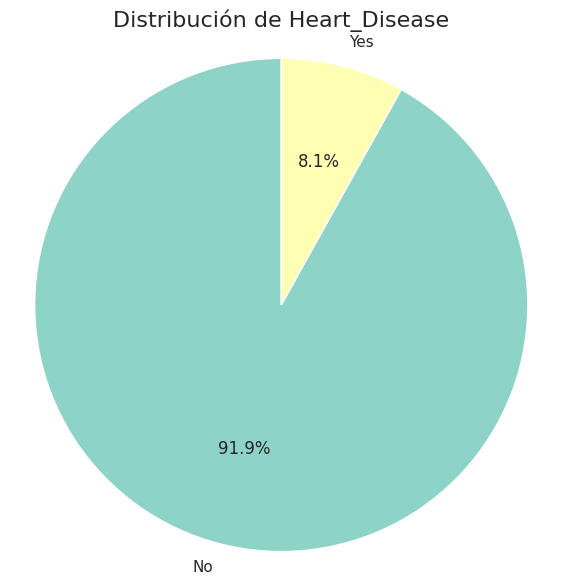

In [21]:
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(data['Heart_Disease'].value_counts(), labels=data['Heart_Disease'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(data['Heart_Disease'].value_counts())))
plt.title("Distribución de Heart_Disease", fontsize=16)  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

*  **Skin_Cancer**
* **Other_Cancer**
* **Depression**
* **Diabetes**
* **Arthritis**
*  **Smoking_History**
*  **Sex**

*   **Variables numericas**:on aquellas que toman valores numéricos y pueden ser medidas o cuantificadas. como son las variables  Height_(cm),Weight_(kg), BMI, Alcohol_Consumption, Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption